In [38]:
%matplotlib notebook

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import reverse_geocoder as rg
import pandas as pd
import numpy as np
import copy

In [40]:
#Load the quakes category files
lfile_path="output_data2/large_quakes_all.csv"
sfile_path="output_data2/strong_quakes_all.csv"
mfile_path="output_data2/medium_quakes_all.csv"
quakes_major=pd.read_csv(lfile_path)
quakes_strong=pd.read_csv(sfile_path)
quakes_medium=pd.read_csv(mfile_path)
quakes_major.set_index('Year')
quakes_strong.set_index('Year')
quakes_medium.set_index('Year')


,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Country
Year,,,,,,,,,,
1980,12.3530,95.1920,20.00,5.1,400,"Andaman Islands, India region",24:37.2,1,1,IN
1980,27.2610,60.2590,33.00,5.3,432,southeastern Iran,45:54.0,1,1,IR
1980,-31.2110,58.7170,10.00,5.0,385,Southwest Indian Ridge,41:45.7,1,1,RE
1980,3.4910,126.7160,54.00,5.0,385,"Kepulauan Talaud, Indonesia",19:05.9,1,1,ID
1980,-13.4710,166.7530,60.00,5.1,400,Vanuatu,34:34.0,1,1,VU
...,...,...,...,...,...,...,...,...,...,...
2020,-29.6807,-177.0812,17.53,5.0,385,"Kermadec Islands, New Zealand",07:55.3,12,21,TO
2020,5.1855,125.2729,44.76,5.0,385,"32 km SW of Sarangani, Philippines",19:57.9,12,22,PH
2020,-58.8503,148.8969,10.00,5.4,449,west of Macquarie Island,47:40.6,12,22,AU


In [41]:
#Pick columns required to plot
columns = ['Year', 'Mag']
#From the  dataframes by magnitude isolate US and reduce columns
usa_quakes_major = quakes_major.loc[quakes_major["Country"] == "US", columns]
usa_quakes_strong = quakes_strong.loc[quakes_strong["Country"] == "US", columns]
usa_quakes_medium = quakes_medium.loc[(quakes_medium["Country"] == "US", columns) ]
#groupby year and get average
usa_quakes_major=usa_quakes_major.groupby('Year').mean()
usa_quakes_medium=usa_quakes_medium.groupby('Year').mean()
usa_quakes_strong=usa_quakes_strong.groupby('Year').mean()


<IPython.core.display.Javascript object>


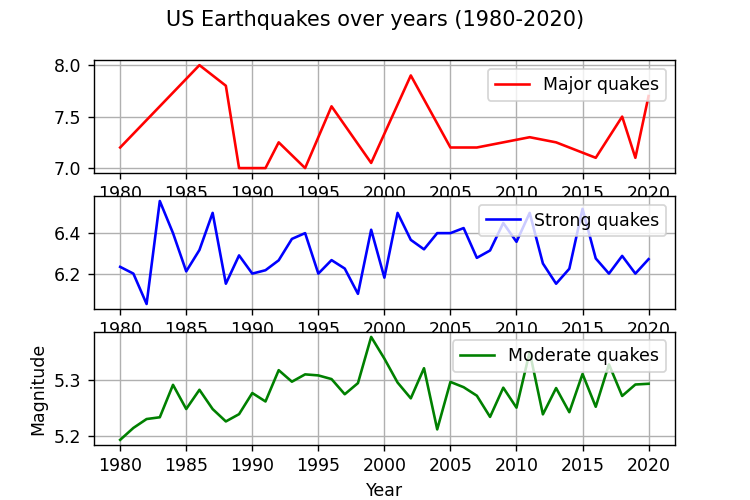

In [42]:
fig,(axs1, axs2, axs3) = plt.subplots(3)
fig.suptitle('US Earthquakes over years (1980-2020)')
fig.set_size_inches(6,4)
major, = axs1.plot(usa_quakes_major.index, usa_quakes_major.values, color="red", label="Major quakes")
strong, =axs2.plot(usa_quakes_strong.index, usa_quakes_strong.values, color="blue", label="Strong quakes")
moderate, =axs3.plot(usa_quakes_medium.index, usa_quakes_medium.values, color="green", label="Moderate quakes")

In [43]:
# Add labels to X and Y axes :: Add title
plt.xlabel("Year")
plt.ylabel("Magnitude")
axs1.legend(handles=[major], loc=1)
axs2.legend(handles=[strong], loc=1)
axs3.legend(handles=[moderate], loc=1)
axs1.grid()
axs2.grid()
axs3.grid()
plt.show()

In [44]:
#Load all quakes for the years 1984 to 1989
quakes_all_8489=pd.read_csv("output_data2/quakes_all_8489.csv")
quakes_all_8489.head()

,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year,Country
0,-37.431,77.627,10.0,5.2,416,Mid-Indian Ridge,1984-01-01 00:46:34.450,1,1,1984,TF
1,-2.601,141.597,33.0,5.5,465,"near the north coast of New Guinea, Papua New ...",1984-01-01 01:55:01.370,1,1,1984,PG
2,41.823,142.137,75.0,5.1,400,"Hokkaido, Japan region",1984-01-01 02:22:43.630,1,1,1984,JP
3,0.950,126.068,65.1,5.0,385,Molucca Sea,1984-01-01 06:00:23.640,1,1,1984,ID
4,33.683,136.894,368.1,7.2,798,"near the south coast of western Honshu, Japan",1984-01-01 09:03:38.850,1,1,1984,JP


In [45]:
#Add a column date to the df
quakes_all_8489['Date']=pd.to_datetime(quakes_all_8489['Time']).dt.date
len(quakes_all_8489)

9970

<IPython.core.display.Javascript object>


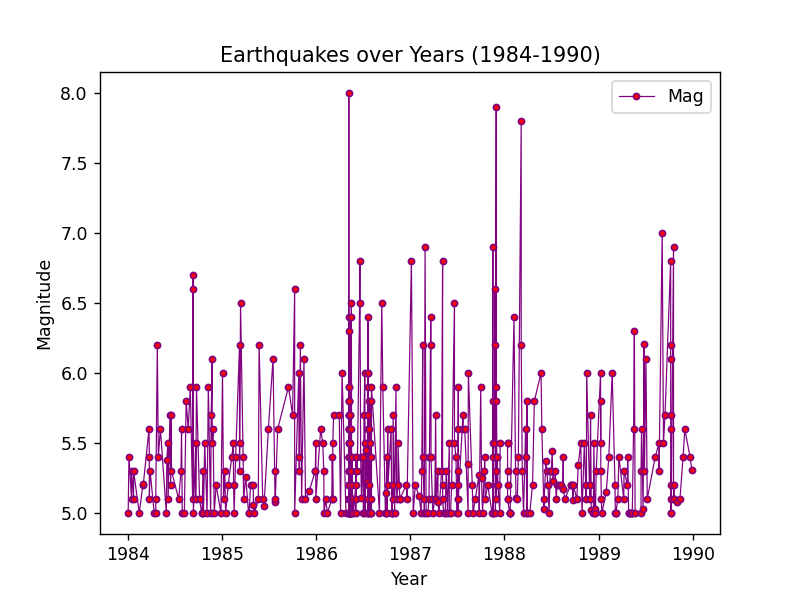

<AxesSubplot:xlabel='Date'>

In [46]:
columns = ['Date', 'Mag']
#From entire dataframe isolate US and reduce columns
quakes_all_8489.loc[quakes_all_8489["Country"] == "US",
                    columns].set_index('Date').plot(marker='.',
                                                    ms = 7, mfc = 'r',
                                                    linewidth=0.7, 
                                                    color='purple')


In [47]:
plt.title("Earthquakes over Years (1984-1990)")
plt.xlabel("Year")
plt.ylabel("Magnitude")

Text(53.402777777777786, 0.5, 'Magnitude')

In [48]:
#Adding the date column
quakes_8489= copy.deepcopy(quakes_all_8489)
quakes_8489_us=quakes_8489.groupby(['Country']).filter(lambda x: (x['Country']=='US').any())
quakes_8489_us['Date']=pd.to_datetime(quakes_8489_us['Time']).dt.date
quakes_8489_us['Date'] = quakes_8489_us['Date'].astype('datetime64')


In [49]:
#Narrow down the quakes to a year
quakes_df = quakes_8489_us[(quakes_8489_us['Date'] > '1986-01-01') & (quakes_8489_us['Date']< '1987-01-01')]
quakes_us=quakes_df[['Lat','Lng', 'Depth', 'Mag', 'Sig', 'Time', 'Place', 'Country', 'Date']]

In [50]:
#the places that the quakes hit in the 5 year span
quakes_us.groupby('Place').count()

,Lat,Lng,Depth,Mag,Sig,Time,Country,Date
Place,,,,,,,,
"47km ENE of San Clemente Is. (SE tip), CA",1,1,1,1,1,1,1,1
"54km NE of Beatty, NV",1,1,1,1,1,1,1,1
"55km NE of Beatty, NV",1,1,1,1,1,1,1,1
"59km NE of Beatty, NV",1,1,1,1,1,1,1,1
"66km ENE of Beatty, NV",1,1,1,1,1,1,1,1
"6km SSW of Morongo Valley, CA",1,1,1,1,1,1,1,1
Alaska Peninsula,2,2,2,2,2,2,2,2
"Andreanof Islands, Aleutian Islands, Alaska",121,121,121,121,121,121,121,121
Central California,8,8,8,8,8,8,8,8


In [51]:
# #Narrow down the quakes to  1986 May
quakes_May = quakes_df[(quakes_df['Date'] > '1986-04-20') & (quakes_df['Date'] < '1986-05-15')]
quakes_May.groupby('Place').count()


,Lat,Lng,Depth,Mag,Sig,Time,Month,Day,Year,Country,Date
Place,,,,,,,,,,,
"Andreanof Islands, Aleutian Islands, Alaska",74,74,74,74,74,74,74,74,74,74,74
"Hawaii region, Hawaii",1,1,1,1,1,1,1,1,1,1,1


<IPython.core.display.Javascript object>


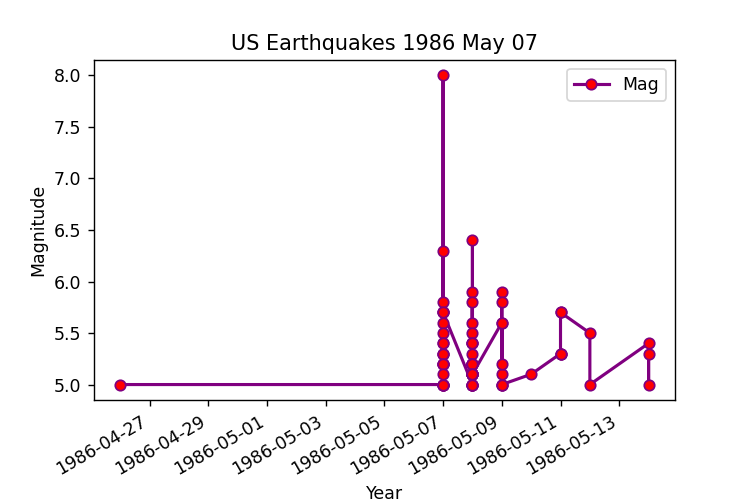

In [52]:
columns = ['Date', 'Mag']
quakes_May[['Date', 'Mag']].set_index('Date').plot(figsize=(6,4),
                                     marker='.',
                                     ms = 12, mfc = 'r',
                                     linewidth=1.8, 
                                     color='purple')
plt.show()

In [53]:
plt.title("US Earthquakes 1986 May 07")
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.plot()

[]

In [54]:
eq_df = quakes_us.loc[quakes_us['Date'] == '1986-05-07']
print("Earthquakes that occured on May 7, 1986")
eq_df.groupby('Place').count()

Earthquakes that occured on May 7, 1986


,Lat,Lng,Depth,Mag,Sig,Time,Country,Date
Place,,,,,,,,
"Andreanof Islands, Aleutian Islands, Alaska",23,23,23,23,23,23,23,23


Analysis : 
Between May 7 and May 15 of 1986 there were 74 quakes. on May 7 1986 alone there were 23 quakes of magnitude 5.0+ on Andreanof Islands, Aleutian Islands, Alaska. The largest of the quakes that hit in 40 years is on May 07 1986 of magnitude 8.0

The Aleutian arc is a seismically active region, evidenced by the many moderate to large earthquakes occurring each year. Since 1900, this region has witnessed twelve large earthquakes (M>7.5) including the May 7, 1986 M8.0 Andreanof Islands, the June 10, 1996 M7.9 Andreanof Islands, and the November 17, 2003 M7.8 Rat Islands earthquakes.

Source: https://earthquake.usgs.gov/earthquakes/eventpage/official19570309142233_30/region-info